In [217]:
import pandas as pd
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [168]:
dfCars = pd.read_csv(r'C:\Leenu\DataSet From Kaggle\archive (17)\cars_24_combined.csv')

In [169]:
dfCars.sample(10)

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
3981,3981,Tata NEXON,2020.0,58343,1,PETROL,GJ-02,Manual,SUV,966000
358,358,Volkswagen Vento,2020.0,22192,2,PETROL,TS-07,Manual,Sedan,809000
7330,7330,Maruti Ertiga,2012.0,98413,2,DIESEL,KA-51,Manual,SUV,602000
5260,5260,Hyundai New Elantra,2015.0,109686,1,PETROL,NaN,Automatic,Lux_sedan,625000
3719,3719,Hyundai Grand i10,2018.0,61189,1,PETROL,MP-15,Manual,HatchBack,443000
1123,1123,Mahindra Kuv100,2016.0,109428,1,DIESEL,MH-12,Manual,SUV,363000
4280,4280,Hyundai Eon,2018.0,86198,2,PETROL,KA-02,Manual,HatchBack,307000
4181,4181,Tata Tiago,2020.0,23116,1,PETROL,MH-03,Automatic,HatchBack,618000
3819,3819,Honda Amaze,2019.0,94218,1,DIESEL,KA-02,Manual,Sedan,611000
4480,4480,Hyundai i20,2013.0,73301,2,PETROL,DL-3C,Manual,HatchBack,294000


In [170]:
dfCars.shape

(8015, 10)

In [171]:
dfCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


In [172]:
dfCars.isnull().sum()

Unnamed: 0      0
Car Name        1
Year            1
Distance        0
Owner           0
Fuel            0
Location      213
Drive           0
Type            0
Price           0
dtype: int64

In [173]:
dfCars.describe()

,Unnamed: 0,Year,Distance,Owner,Price
count,8015.000000,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,4007.000000,2016.995009,52621.411728,1.300187,5.748829e+05
std,2313.875537,2.861454,29182.922728,0.510893,2.651049e+05
min,0.000000,2010.000000,0.000000,1.000000,1.190000e+05
25%,2003.500000,2015.000000,30730.000000,1.000000,3.930000e+05
50%,4007.000000,2017.000000,50359.000000,1.000000,5.350000e+05
75%,6010.500000,2019.000000,71762.000000,2.000000,6.980000e+05
max,8014.000000,2023.000000,971212.000000,4.000000,3.300000e+06


In [174]:
dfCars.dtypes

Unnamed: 0      int64
Car Name       object
Year          float64
Distance        int64
Owner           int64
Fuel           object
Location       object
Drive          object
Type           object
Price           int64
dtype: object

In [175]:
dfCars.Year =dfCars.Year.fillna(value= dfCars.Year.mean())

In [176]:
#dfCars['Year'] =pd.to_datetime(dfCars['Year'],format='%Y')

dfCars['Year'] = dfCars['Year'].astype(int)

In [177]:
dfCars['Car Name'].unique()

array(['Maruti S PRESSO', 'Hyundai Xcent', 'Tata Safari',
       'Maruti Vitara Brezza', 'Tata Tiago', 'Maruti Swift',
       'Hyundai i20', 'Renault Kwid', 'Hyundai Grand i10', 'Maruti IGNIS',
       'Honda Brio', 'Hyundai Elite i20', 'Honda City', 'Maruti Baleno',
       'Honda WR-V', 'Honda Amaze', 'Maruti Alto 800', 'Maruti Celerio',
       'Ford Ecosport', 'Maruti Ciaz', 'Datsun Redi Go', 'Tata TIAGO NRG',
       'Hyundai Santro Xing', 'Ford FREESTYLE', 'Maruti Dzire',
       'Maruti Alto', 'Hyundai NEW SANTRO', 'Maruti Alto K10',
       'Ford Endeavour', 'Maruti Swift Dzire', 'Maruti Wagon R 1.0',
       'Hyundai GRAND I10 NIOS', 'Maruti Celerio X',
       'Toyota URBAN CRUISER', 'Mahindra XUV500', 'Hyundai Verna',
       'Hyundai VENUE', 'Tata NEXON', 'Mahindra KUV 100 NXT',
       'Toyota YARIS', 'Mahindra XUV 3OO', 'Renault TRIBER',
       'Hyundai Tucson New', 'Mahindra TUV300', 'Toyota Glanza',
       'Maruti Eeco', 'Renault Duster', 'Hyundai i10', 'Nissan MAGNITE',
       '

In [178]:
dfCars[dfCars['Car Name'] == 'Maruti S PRESSO']

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022,3878,1,PETROL,HR-98,Manual,HatchBack,514000
11,11,Maruti S PRESSO,2019,30347,1,PETROL,MH-48,Automatic,HatchBack,481000
311,311,Maruti S PRESSO,2022,5787,1,PETROL,GJ-17,Manual,HatchBack,444000
609,609,Maruti S PRESSO,2021,24447,1,CNG,UP-32,Manual,HatchBack,554000
632,632,Maruti S PRESSO,2021,16563,1,PETROL,PB-27,Manual,HatchBack,462000
...,...,...,...,...,...,...,...,...,...,...
7475,7475,Maruti S PRESSO,2019,65546,1,PETROL,MP-09,Manual,HatchBack,419000
7512,7512,Maruti S PRESSO,2021,42954,1,PETROL,KA-52,Manual,HatchBack,488000
7737,7737,Maruti S PRESSO,2021,29235,1,PETROL,GJ-27,Manual,HatchBack,473000
7808,7808,Maruti S PRESSO,2020,47417,1,CNG,MH-14,Manual,HatchBack,440000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car Name', ylabel='count'>

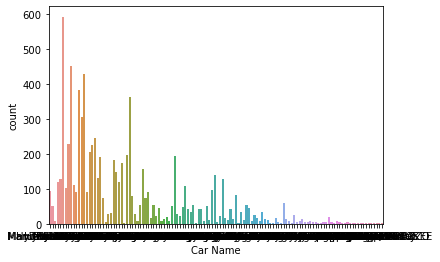

In [179]:
sns.countplot(dfCars['Car Name'])

In [180]:
dfCars.corr()

,Unnamed: 0,Year,Distance,Owner,Price
Unnamed: 0,1.000000,-0.003671,-0.000674,0.019931,-0.006814
Year,-0.003671,1.000000,-0.371690,-0.212095,0.501837
Distance,-0.000674,-0.371690,1.000000,0.137670,-0.198950
Owner,0.019931,-0.212095,0.137670,1.000000,-0.149925
Price,-0.006814,0.501837,-0.198950,-0.149925,1.000000


<AxesSubplot:>

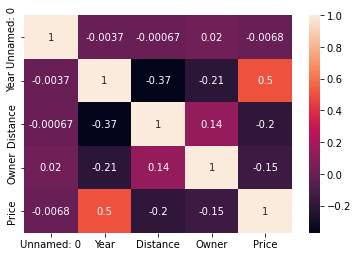

In [181]:
sns.heatmap(dfCars.corr(),annot=True)

In [182]:
dfCars.columns

Index(['Unnamed: 0', 'Car Name', 'Year', 'Distance', 'Owner', 'Fuel',
       'Location', 'Drive', 'Type', 'Price'],
      dtype='object')

In [183]:
Fuel =LabelEncoder()
dfCars.Fuel =Fuel.fit_transform(dfCars.Fuel)

Drive =LabelEncoder()
dfCars.Drive =Fuel.fit_transform(dfCars.Drive)

Type =LabelEncoder()
dfCars.Type =Fuel.fit_transform(dfCars.Type)

In [184]:
dfCars.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022,3878,1,3,HR-98,1,0,514000
1,1,Hyundai Xcent,2018,32041,1,3,TN-22,1,4,674000
2,2,Tata Safari,2021,96339,1,1,TS-08,0,3,1952000
3,3,Maruti Vitara Brezza,2019,51718,1,1,WB-24,1,3,690000
4,4,Tata Tiago,2021,19811,1,3,HR-51,1,0,526000


In [185]:
dfCars.drop_duplicates()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022,3878,1,3,HR-98,1,0,514000
1,1,Hyundai Xcent,2018,32041,1,3,TN-22,1,4,674000
2,2,Tata Safari,2021,96339,1,1,TS-08,0,3,1952000
3,3,Maruti Vitara Brezza,2019,51718,1,1,WB-24,1,3,690000
4,4,Tata Tiago,2021,19811,1,3,HR-51,1,0,526000
...,...,...,...,...,...,...,...,...,...,...
8010,8010,Datsun Redi Go,2018,11500,1,3,MH-01,1,0,292000
8011,8011,Toyota YARIS,2018,73393,2,3,KA-03,1,4,534000
8012,8012,Volkswagen Ameo,2016,83810,2,3,UP-78,1,4,424000
8013,8013,Hyundai GRAND I10 NIOS,2019,39162,1,3,CH-01,0,0,685000


In [186]:
dfCars.drop(['Unnamed: 0'], axis =1, inplace =True)

In [187]:
dfCars

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022,3878,1,3,HR-98,1,0,514000
1,Hyundai Xcent,2018,32041,1,3,TN-22,1,4,674000
2,Tata Safari,2021,96339,1,1,TS-08,0,3,1952000
3,Maruti Vitara Brezza,2019,51718,1,1,WB-24,1,3,690000
4,Tata Tiago,2021,19811,1,3,HR-51,1,0,526000
...,...,...,...,...,...,...,...,...,...
8010,Datsun Redi Go,2018,11500,1,3,MH-01,1,0,292000
8011,Toyota YARIS,2018,73393,2,3,KA-03,1,4,534000
8012,Volkswagen Ameo,2016,83810,2,3,UP-78,1,4,424000
8013,Hyundai GRAND I10 NIOS,2019,39162,1,3,CH-01,0,0,685000


In [188]:
CarName = LabelEncoder()
dfCars['Car Name'] = CarName.fit_transform(dfCars['Car Name'])

Location = LabelEncoder()
dfCars['Location'] = CarName.fit_transform(dfCars['Location'])

In [189]:
dfCars

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,74,2022,3878,1,3,102,1,0,514000
1,34,2018,32041,1,3,313,1,4,674000
2,104,2021,96339,1,1,368,0,3,1952000
3,77,2019,51718,1,1,425,1,3,690000
4,107,2021,19811,1,3,90,1,0,526000
...,...,...,...,...,...,...,...,...,...
8010,3,2018,11500,1,3,197,1,0,292000
8011,118,2018,73393,2,3,105,1,4,534000
8012,119,2016,83810,2,3,413,1,4,424000
8013,23,2019,39162,1,3,18,0,0,685000


<AxesSubplot:>

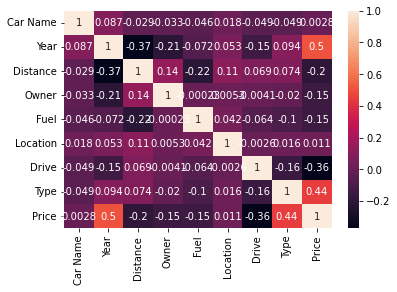

In [190]:
sns.heatmap(dfCars.corr(),annot=True)

In [223]:
X = dfCars[['Location','Year', 'Type']]
Y = dfCars['Price']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= .25)

In [225]:
modelSVR = SVR()
modelSVR.fit(X_train,y_train)

SVR()

In [226]:
PredSVR = modelSVR.predict(X_test)

In [227]:
r2_score(y_test, PredSVR)

-0.02123049817831446

In [228]:
modelLR = LinearRegression()
modelLR.fit(X_train,y_train)

LinearRegression()

In [229]:
predLR = modelLR.predict(X_test)

In [230]:
r2_score(y_test, predLR)

0.4016244349906709

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='Price'>

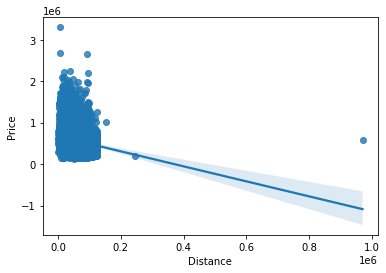

In [231]:
sns.regplot(dfCars['Distance'],dfCars['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel', ylabel='Price'>

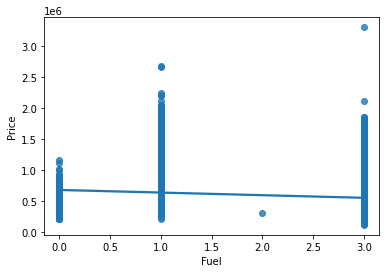

In [232]:
sns.regplot(dfCars['Fuel'],dfCars['Price'])

<AxesSubplot:xlabel='Fuel', ylabel='count'>

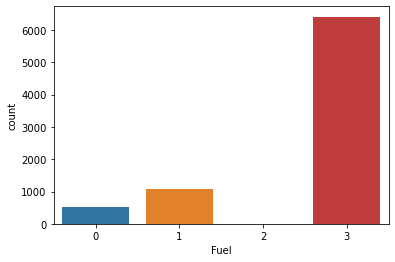

In [233]:
sns.countplot(x ='Fuel', data = dfCars)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Price'>

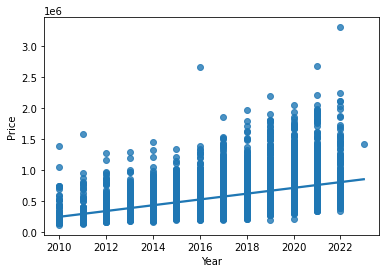

In [234]:
sns.regplot(dfCars['Year'],dfCars['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='Price'>

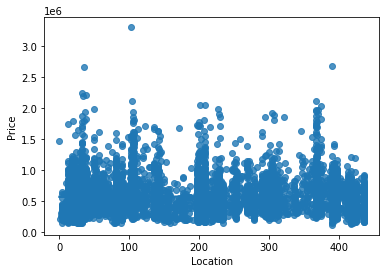

In [235]:
sns.regplot(dfCars['Location'],dfCars['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Price'>

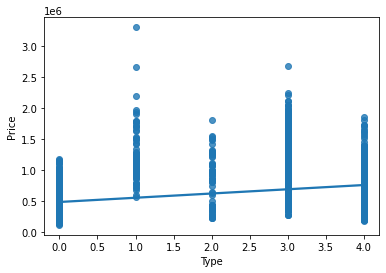

In [236]:
sns.regplot(dfCars['Type'],dfCars['Price'])

In [237]:
# Random Forest Regressor Algorithm
modelRFR = RandomForestRegressor()
modelRFR.fit(X_train,y_train)

RandomForestRegressor()

In [238]:
predRFR = modelRFR.predict(X_test)

In [239]:
r2_score(y_test,predRFR)

0.5142746200559551

In [240]:
# AdaBoost Regressor Algorithm
modelAdaBoost = AdaBoostRegressor()
modelAdaBoost.fit(X_train,y_train)

AdaBoostRegressor()

In [241]:
predAda = modelAdaBoost.predict(X_test)

In [242]:
r2_score(y_test,predRFR)

0.5142746200559551

RANSAC regression algorithm is useful for handling the outliers dataset. Instead of taking care of outliers using statistical and other techniques, one can use RANSAC regression algorithm which takes care of the outlier data.

In [243]:
modelRANS = RANSACRegressor()
modelRANS.fit(X_train,y_train)

RANSACRegressor()

In [244]:
predRans = modelRANS.predict(X_test)

In [245]:
r2_score(y_test, predRans)

0.14597946181843946